# **_MINI-PROJET - MDI220_**
#### Jeanne MALÉCOT

---
### _Imports utiles_

In [97]:
import csv
import scipy
import numpy as np
from scipy.stats import probplot, gamma
import matplotlib.pyplot as plt

---
---
## **Exercice 1**

### Question 1
---

Ouverture du fichier .csv

In [57]:
with open('NuclearPowerAccidents2016.csv', newline='') as csvfile:
     data = list(csv.reader(csvfile)) # On ouvre le fichier sous forme de liste afin de pouvoir afficher chaque ligne séparément

In [58]:
print(data[0])

['Date', 'Location', 'Cost (millions 2013US$)', 'INES', 'Smyth Magnitude', 'Region', 'Description', 'Fatalities']


> Le coût en million dollars 2013 est indiqué dans la troisième colonne du fichier.

In [59]:
index = 0
for i in range (1, len(data)):
    if "Three Mile Island" in data[i][6] :
        index = i

print(index)
print(data[4])

4
['3/28/1979', 'Middletown, Pennsylvania, United States', '10910', '5', '7.9', 'NA', 'Equipment failure and operator error contributed to loss of coolant and partial core meltdown at Three Mile Island nuclear reactor.', '0']


> On a trouvé la ligne décrivant l'accident de Three Mile Island, et donc sa date

In [60]:
def compare_dates(date1, date2):
    """ compare deux dates, sous forme de liste [mois, jour, annee],
    renvoie 1 si date2>date1, -1 si date2<date1, et 0 en cas d'égalité"""
    if date2[2]>date1[2]:
        return 1
    elif date2[2]<date1[2]:
        return -1
    else : #cas d'égalite : on regarde le mois
        if date2[0]>date1[0]:
            return 1
        elif date2[0]<date1[0]:
            return -1
        else :
            if date2[1]>date1[1]:
                return 1
            elif date2[1]<date1[1]:
                return -1
            else :
                return 0    

In [61]:
date_TMI = data[4][0].split("/") #date de l'accident de Three Mile Island

couts_vector = []
new_data = []

for i in range (1, len(data)):
    date = data[i][0].split("/")
    if data[i][2] != '' and compare_dates(date_TMI, date) < 0 :
        couts_vector.append(float(data[i][2]))
        new_data.append(data[i])

In [62]:
print(len(couts_vector))

55


> On obtient bien 55 observations

### Question 2
---

**a)** La fonction quantile est l'inverse de la fonction répartition.  
On cherche alors à résoudre :  
$$F_{\mu, \sigma^2}(x) = p$$  
Avec F la fonction de répartition de la loi normale.  
Soit
$$\frac{1}{2}\left(1 + erf\left(\frac{x-\mu}{\sigma\sqrt{2}}\right)\right)=p $$
$$ \Leftrightarrow erf\left(\frac{x-\mu}{\sigma\sqrt{2}}\right) =2p+1 $$
$$ \Leftrightarrow \frac{x-\mu}{\sigma\sqrt{2}} = erf^{-1}(2p+1) $$
$$ \Leftrightarrow x = \sigma \sqrt{2}erf^{-1}(2p+1)+\mu $$ 
Donc :
$$ F^{-1}_{\mu, \sigma^2}(p) = \sigma \sqrt{2}erf^{-1}(2p+1)+\mu $$ 
D'où le résultat :
$$ \boxed{F^{-1}_{\mu, \sigma^2}(p) = \sigma F^{-1}_{0, 1}(p)+\mu} $$

**b)** Tracé de la QQ-plot

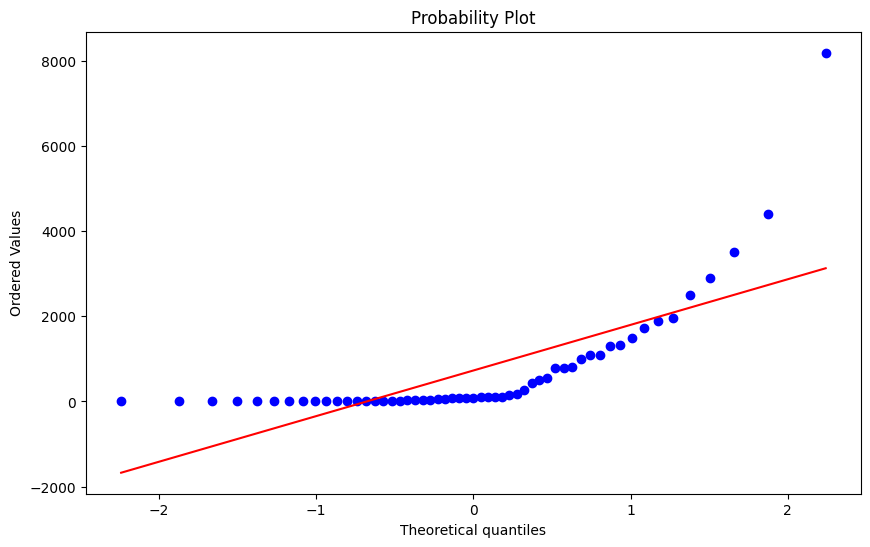

In [63]:
plt.figure(figsize=(10,6))
scipy.stats.probplot(couts_vector, dist=scipy.stats.norm(), plot=plt)
plt.show()

### Question 3
---

**b)** On procède de la même façon que pour la question 2
$$F_{\lambda_0bda}(x) = p$$  
Avec F la fonction de répartition de la loi exponentielle.  
Soit
$$1- e^{-\lambda x}=p $$
$$ \Leftrightarrow  e^{-\lambda x}= 1 - p $$
$$ \Leftrightarrow  \lambda x= - ln(1 - p) $$
$$ \Leftrightarrow  x= - \frac{ln(1 - p)}{\lambda } $$
Donc :
$$ F^{-1}_{\lambda}(p) = - \frac{ln(1 - p)}{\lambda } $$ 
D'où le résultat :
$$ \boxed{F^{-1}_{\lambda}(p) = \frac{F^{-1}_{1}(p)}{ \lambda}} $$

**b)** Tracé de la QQ-plot

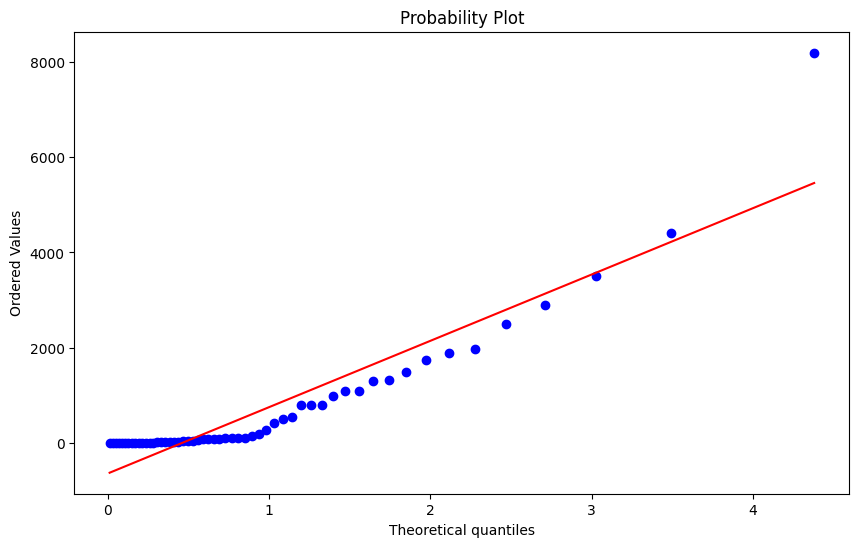

In [64]:
plt.figure(figsize=(10,6))
scipy.stats.probplot(couts_vector, dist=scipy.stats.expon(), plot=plt)
plt.show()

### Question 4
---

La courbe obtenue avec la loi exponentielle est plus applatie que pour la loi normale, et se rapproche plus d'une droite. 
Il est donc plus plausible que ces données suivent une loi exponentielle.

---
---
## **Exercice 2**

### Question 1
---

Pour une loi exponentielle :
$$ p(x,\lambda)=\prod^n_{i=0}{\lambda e^{-\lambda x_i}} $$
Passons au logarithme :
$$ log\left(p(x,\lambda)\right) = \sum^n_{i=0}{log (\lambda e^{ x_i^{-\lambda}})} = \sum^n_{i=0}{ \left( log(\lambda) - \lambda log (e^{ x_i}) \right)} = nlog(\lambda) - \lambda \sum^n_{i=0}{x_i} $$
On calcule maintenant la dérivée partielle :
$$ \frac{\partial log(p(x,\lambda))}{\partial \lambda} = \frac{n}{\lambda} - \sum^n_{i=0}{x_i} $$
On obtient alors :
$$ \boxed{ \hat{\lambda} = \frac{n}{\sum^n_{i=0}{x_i}} }$$


In [72]:
couts_vector = np.array(couts_vector)

estimateur = 1/np.mean(couts_vector)

In [73]:
print(estimateur)

0.0013767725947156965


### Question 2
---

In [74]:
def densite_exp (x, a):
    return  a*np.exp(-a*x)

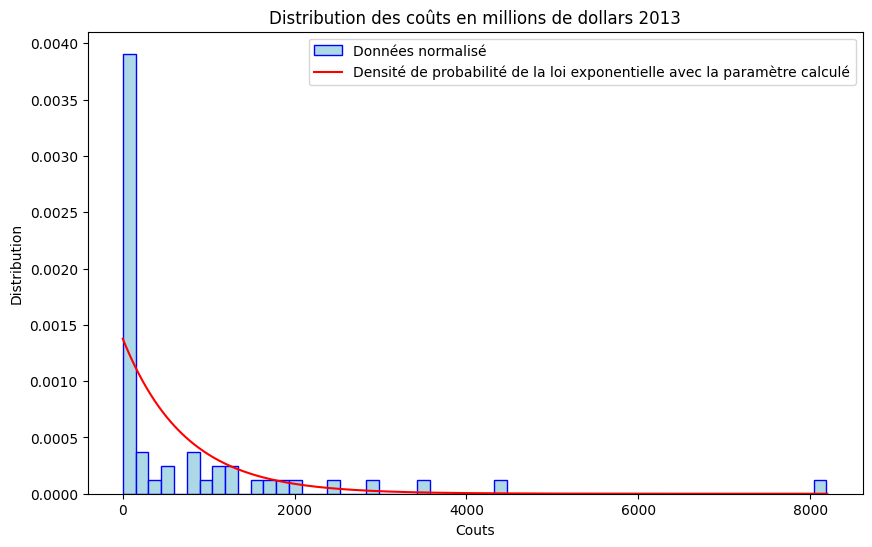

In [82]:
abs = np.arange(8200)
densite = densite_exp(abs, estimateur)

plt.figure(figsize=(10,6))

plt.hist(couts_vector, density = True, bins=55, edgecolor = 'blue', color="lightblue", label=["Données normalisé"])

plt.plot(abs, densite, color="red", label="Densité de probabilité de la loi exponentielle avec la paramètre calculé")

plt.xlabel('Couts')
plt.ylabel('Distribution')
plt.title("Distribution des coûts en millions de dollars 2013")
plt.legend()

plt.show()

### Question 3
---

Calculons d'abord 
$$ \mathbb{E}_\lambda [T_1(X)] = \frac{1}{n} \mathbb{E} \left(\sum_{i=0}^n{X_i}\right) = \mathbb{E}(X_i) = \frac{1}{\lambda} $$
D'où la première égalité :
$$ \boxed{\mathbb{E}_\lambda [T_1(X)] = g_1(\lambda)}$$
**Donc l'échantillon n'est pas biaisé.**

        
Ensuite, on doit montrer l'égalité :
$$ var_\lambda [T_1(X)] = \frac{g_1'({\lambda})^2}{I(\lambda)}$$
On a d'une part :
$$ \boxed{var_\lambda [T_1(X)] = \frac{1}{n^2} var \left(\sum_{i=0}^n{X_i}\right) = \frac{1}{n} var (X_i) = \frac {1}{n\lambda^2} }$$
D'autre part, le modèle étant régulier :

$$ \color{pink} I_1 (\lambda) = var_\lambda\left( \frac{\partial log (p_{\lambda,1 })}{\partial \lambda} (x_1, \lambda) \right) = \mathbb{E}_\lambda \left(\left( \frac{\partial log (p_{\lambda,1 })}{\partial \lambda} (x_1, \lambda) \right)^2 \right) $$
Avec 
$$  log(p_{\lambda,1 }(x_1, \lambda))=log(\lambda e ^{-\lambda x_1}) = log(\lambda) - \lambda x_1 $$
$$ \left( \frac{\partial log(p_{\lambda , 1})}{\partial \lambda} (x_1, \lambda)\right)^2 = \left( \frac{1}{\lambda} - x_1\right)^2 $$
Ainsi on a :
$$ I_1 (\lambda)  =  \mathbb{E}_\lambda \left(\left( \frac{1}{\lambda} - x_1\right)^2 \right) = \frac{1}{\lambda^2} $$
Or on sait que :
$$ \color{pink} I (\lambda) = nI_1 (\lambda)$$ 
Donc sachant que
$$ g_1'({\lambda})^2 = \frac{1}{\lambda^4} $$
On a bien
$$ \boxed{\frac{g_1'({\lambda})^2}{I(\lambda)} = \frac{\frac{1}{\lambda^4}}{\frac{n}{\lambda^2}} = \frac{1}{n\lambda^2}}$$
**Donc T<sub>1</sub>(X) est un estimateur efficace pour g<sub>1</sub>($\lambda$)**


### Question 4
---

In [43]:
T1 = couts_vector.mean()
print(T1)

726.3363636363637


> Pour l'échantillon donné, on trouve **g<sub>1</sub> = 726.3**.

### Question 5
---

L'estimateur T<sub>1</sub> étant non biaisé _(cf. question 3)_, on a :
$$ R(\lambda, T_1)= \frac{1}{n \lambda^2} $$
On cherche alors à exprimer $R(\lambda, \widetilde{T}_{1,\eta})$ : 
$$ \color{pink} R(\lambda, \widetilde{T}_{1,\eta}) = \left( b(\lambda, \widetilde{T}_{1,\eta}) \right)^2 + Var_\lambda(\widetilde{T}_{1,\eta}(X)) $$
  
$$ b(\lambda, \widetilde{T}_{1,\eta}) = \mathbb{E}_\lambda \left(\widetilde{T}_{1,\eta}(X) - \frac{1}{\lambda} \right) = \eta \mathbb{E}_\lambda (T_{1}(X)) - \frac{1}{\lambda} =  \frac{\eta - 1}{\lambda}  $$
$$ Var_\lambda(\widetilde{T}_{1,\eta}(X)) = \eta ^2 Var_\lambda(T_{1}(X)) = \frac{\eta^2}{n\lambda ^2} $$
Donc
$$ \boxed{R(\lambda, \widetilde{T}_{1,\eta}) = \left(\frac{\eta - 1}{\lambda} \right)^2 + \frac{\eta^2}{n\lambda ^2} }$$

On veut déterminer les valeurs de $\eta$ telles que $R(\lambda, \widetilde{T}_{1,\eta}) < R(\lambda, T_1)$ :
$$ R(\lambda, \widetilde{T}_{1,\eta}) < R(\lambda, T_1) $$
$$ \Leftrightarrow \left(\frac{\eta - 1}{\lambda} \right)^2 + \frac{\eta^2}{n\lambda ^2} < \frac{1}{n \lambda^2} $$
$$ \Leftrightarrow (n+1)\eta^2 - 2n\eta + (n-1) < 0 $$
En résolvant l'équation du second degré à déterminant strictement positif, on trouve les racines réelles    $\eta_1 = \frac{n-1}{n+1}$  ;  $\eta_2 =1$  
Donc l'inégalité est vérifiée pour :
$$ \boxed{ \frac{n-1}{n+1} < \eta < 1} $$
Cela n'entre pas en contradiction avec la question précédente : T<sub>1</sub> reste un estimateur efficace. On a simplement trouvé un ensemble d'autres estimateurs efficaces ayant un risque quadratique plus faible.

### Question 6
--- 

On cherche $\eta$ tel que :
$$ \mathbb{E}_\lambda \left(\widetilde{T}_{1,\eta}(X) - \frac{ln(2)}{\lambda} \right) = 0 $$
$$ \Leftrightarrow \frac{\eta}{\lambda}  - \frac{ln(2)}{\lambda} = 0 $$
$$ \Leftrightarrow \eta  = {ln(2)}$$

Donc $T_{1,\eta}$ est l’estimateur sans biais de la médiane pour $ \boxed{\eta = ln(2)}$

In [55]:
T1_n = np.log(2)*T1
print(T1_n, ";", np.median(couts_vector))

503.4580025927086 ; 89.9


>Pour cet échantillon, l'estimateur sans biais de la médiane donne la valeur **503,46**.  
On est assez loin de la médiane empirique, puique celle-ci vaut **89,9**.

### Question 7
---

On avait déjà exprimé les différents risques quadratiques :
$$  R(\lambda, \widetilde{T}_{1,\eta}) = \left(\frac{\eta - 1}{\lambda} \right)^2 + \frac{\eta^2}{n\lambda ^2} $$
$$  R(\lambda, T_1)= \frac{1}{n \lambda^2}$$
En prenant ici $\eta = ln(2)$ :

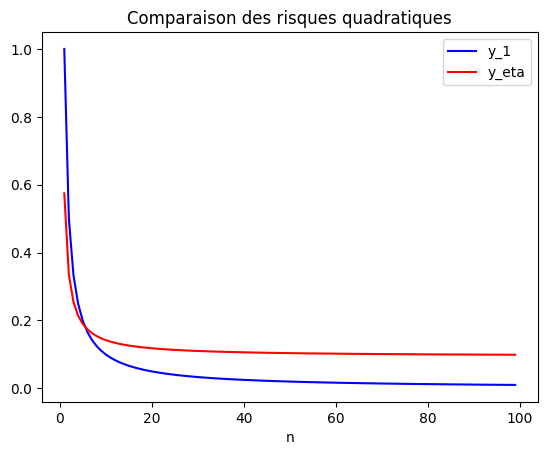

In [88]:
eta = np.log(2)

def R_1(n):
    return 1/n

def R_eta(n):
    return (eta-1)**2 +(eta**2 /n)

x = np.arange(1,100)
y_1 = R_1(x)
y_eta = R_eta(x)

plt.plot(x, y_1, color="blue",  label="y_1")
plt.plot(x, y_eta, color = "red", label="y_eta")

plt.xlabel("n")
plt.title("Comparaison des risques quadratiques")

plt.legend()
plt.show()

> On a représenté ci-dessus les risques quadratiques des estimateurs $\color{lightblue} T_1$ et $\color{red} \widetilde{T}_{1,\eta}$ (_multipliés par un facteur_ $\lambda^2$) en fonction de la taille n de l'échantillon.  
On constate que pour des valeurs de n dignes d'intérêt, le risque quadratique est plus faible avec l'estimateur $\color{lightblue} T_1$ - _notamment dans notre cas, où n=55_.

---
---
## **Exercice 3**

### Question 1
---

- Hypothèse nulle : $\frac{1}{\lambda} < 1000$

- Hypothèse alternative :  $\frac{1}{\lambda} \geq 1000$

### Question 2
---

D'après le principe de Neyman-Pearson, le test le plus puissant pour le niveau $\alpha$ est le test du **maximum de vraisemblance**.  
on a :
$$ p(\lambda, x)= \lambda^n e^{-\lambda \sum_{i=0}^n x_i}$$
On écrit alors le rapport de vraisemblance, avec $\lambda < \lambda'$ :
$$ \frac{L(\lambda, x_1,...,x_n)}{L(\lambda', x_1,...,x_n)} = \left(\frac{\lambda}{\lambda'} \right)^n e^{(\lambda'-\lambda)\sum_{i=0}^n x_i}$$

Pour avoir le test le plus puissant, ce rapport doit être de vérifier une inégalité de la forme :
$$ \frac{L(\lambda, x_1,...,x_n)}{L(\lambda', x_1,...,x_n)} < k $$
Donc :
$$ \sum_{i=0}^n x_i > \frac{1}{\lambda' - \lambda} log\left(k \left(\frac{\lambda'}{\lambda} \right)^n \right) = c $$
Où c est obtenu par l'égalité :

$$ \alpha = \mathbb{P}\left(\sum_{i=0}^n X_i > c  |  \lambda > \lambda_{0} \right) $$
avec $\lambda_0 = \frac{1}{1000}$, et $\sum_{i=0}^n X_i \sim Gama(n, \lambda)$

On effectue le test en remplaçant $c$ par $\sum_{i=0}^n x_i$, et si le résultat est inférieur à $\alpha$, l'hypothèse est validée.

### Question 3
---

In [104]:
test = scipy.stats.gamma.cdf(x=couts_vector.sum(),a=couts_vector.size, scale=1000)
print(test)  

0.013717486423264914


> Le test donne la p-valeur $0,01372 < \alpha$, donc l'hypothèse H<sub>0</sub> est **acceptée**.

### Question 4
--- 

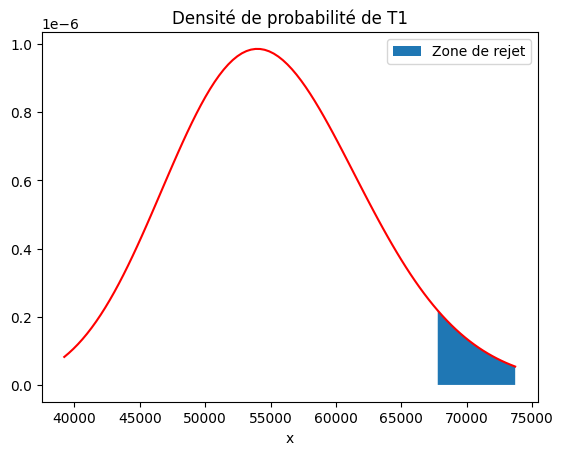

In [126]:
n  = 55
lambda_0 = 1/1000

k=gamma.ppf(0.95, n,scale = 1/lambda_0 )

x = np.linspace(gamma.ppf(0.01, n, scale=1/lambda_0), gamma.ppf(0.99, n, scale=1/lambda_0), 100)

plt.plot(x, gamma.pdf(x, n, scale=1/lambda_0)/n, color ="red")
plt.fill_between(x,gamma.pdf(x, n, scale=1/lambda_0)/n, where= (x>k), label="Zone de rejet")

plt.title('Densité de probabilité de T1')
plt.xlabel('x')
plt.legend()
plt.show()